## Visualizer demo

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

# Set working directory to the base directory 'gpudrive'
working_dir = Path.cwd()
while working_dir.name != 'gpudrive':
    working_dir = working_dir.parent
    if working_dir == Path.home():
        raise FileNotFoundError("Base directory 'gpudrive' not found")
os.chdir(working_dir)

from gpudrive.env.config import EnvConfig, RenderConfig
from gpudrive.env.dataset import SceneDataLoader
from gpudrive.visualize.utils import img_from_fig

from gpudrive.env.env_torch import GPUDriveTorchEnv
# Increase the resolution of the figure
#plt.rcParams['figure.dpi'] = 100  # Higher DPI for better resolution

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
DYNAMICS_MODEL = "delta_local" # "delta_local" / "state" / "classic"
NUM_ENVS = 2

# Configs
render_config = RenderConfig(render_3d=True)
env_config = EnvConfig(dynamics_model=DYNAMICS_MODEL)

In [4]:
# Create data loader
train_loader = SceneDataLoader(
    root="data/processed/examples",
    batch_size=NUM_ENVS,
    dataset_size=NUM_ENVS,
    sample_with_replacement=True,
)


env = GPUDriveTorchEnv(
    config=env_config,
    data_loader=train_loader,
    max_cont_agents=64,
    device="cpu",
    render_config=render_config,
    action_type="continuous" # "continuous" or "discrete"
)

_ = env.reset(env.cont_agent_mask)

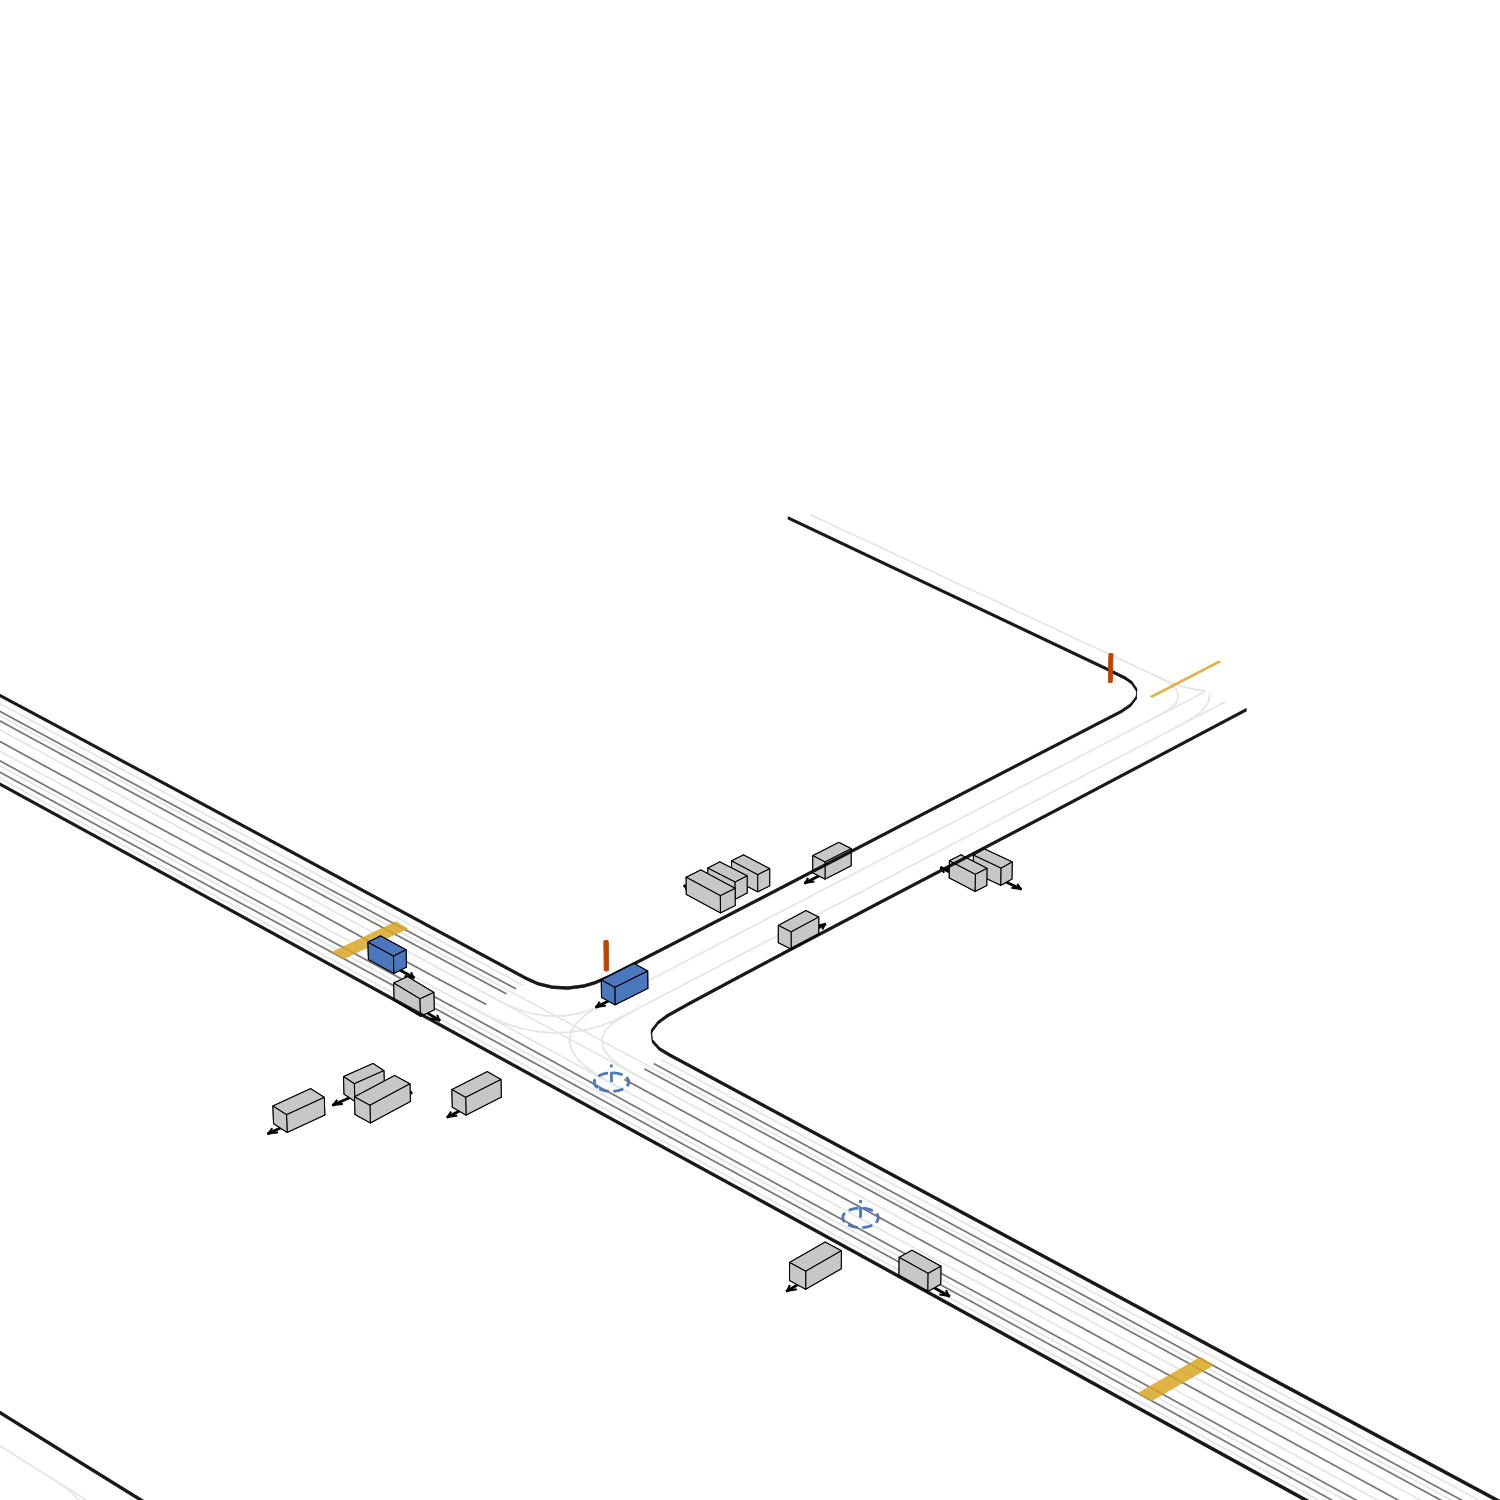

In [9]:
# Plot a bird's eye view of the environment
sim_state_figs = env.vis.plot_simulator_state(
    env_indices=[0],
    zoom_radius=50,
    #center_agent_indices=[1],
    time_steps=[0],
)
Image.fromarray(img_from_fig(sim_state_figs[0]))

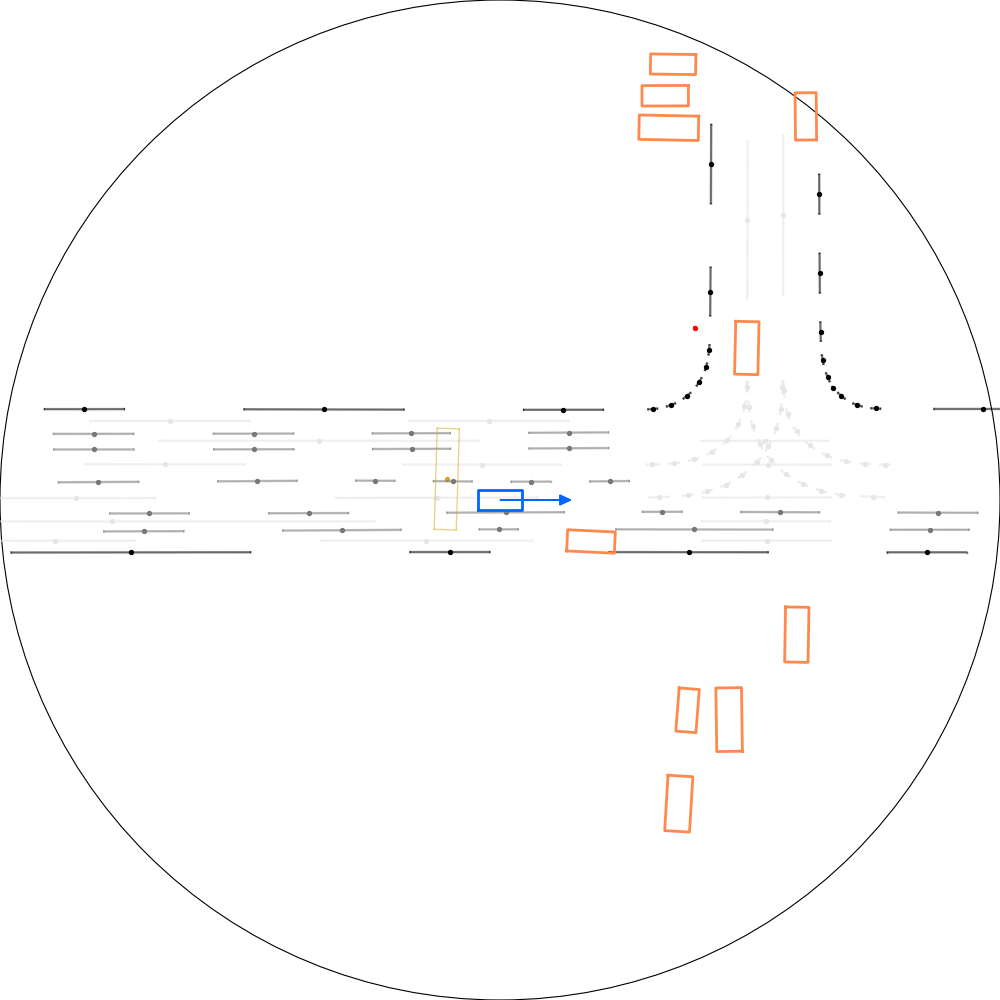

In [12]:
#Plot an agent's POV
agent_obs_fig = env.vis.plot_agent_observation(
    env_idx=0,
    agent_idx=7,
    figsize=(10, 10),
)
Image.fromarray(img_from_fig(agent_obs_fig))